<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [13]:
import numpy as np
import gensim
import os
import re
import pandas as pd

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
from matplotlib import pyplot as plt

import spacy
nlp = spacy.load("en_core_web_lg")

In [14]:
df = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


## Lemmatize Reviews

In [15]:
def get_lemmas(text):
    lemmas = []
    doc = nlp(text)
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    return lemmas

In [16]:
reviews = df['reviews.text']
df['lemmas'] = reviews.apply(get_lemmas)

In [20]:
def lower_list(word_list):
    new_list = []
    for word in word_list:
        new_list.append(word.lower())
    return new_list
    
df.lemmas = df.lemmas.apply(lower_list)

In [21]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,lemmas
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...","[order, 3, item, bad, quality, miss, backup, s..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...","[bulk, expensive, way, product, like]"
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...","[duracell, price, happy]"
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...","[work, brand, battery, well, price]"
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...","[battery, long, last, price, great]"


## Select Appropriate # of Topics

In [26]:
tokens = df.lemmas

#make the gensim dict:
id2word = corpora.Dictionary(tokens)

#make the corpus:
corpus = [id2word.doc2bow(text) for text in tokens]

In [27]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(tokens, id2word, corpus, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = {}
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        coherencemodel = CoherenceModel(model=model, texts=tokens, dictionary=id2word, coherence='c_v')
        coherence_values[num_topics] = coherencemodel.get_coherence()

    return coherence_values

In [29]:
#Call the function to calc the coherence values:
c_values = compute_coherence_values(tokens, id2word, corpus, limit=35, start=2, step=3)

In [34]:
cv_series = pd.Series(c_values)
cv_series.sort_values(ascending=False)

5     0.364454
20    0.357981
23    0.347058
11    0.335894
32    0.332393
14    0.331900
26    0.326919
8     0.325678
29    0.319776
17    0.315305
2     0.309664
dtype: float64

## Fit a Gensim LDA Topic Model:

In [35]:
#We'll do 2, one with 5 topics, one with 20:
lda = LdaMulticore(corpus=corpus, id2word=id2word, random_state=42, num_topics = 5, passes=10, workers=4)
lda.print_topics()

[(0,
  '0.101*"battery" + 0.026*"good" + 0.026*"long" + 0.022*"price" + 0.022*"brand" + 0.020*"work" + 0.019*"buy" + 0.018*"great" + 0.016*"amazon" + 0.011*"life"'),
 (1,
  '0.068*"great" + 0.047*"tablet" + 0.042*"good" + 0.037*"price" + 0.020*"product" + 0.019*"amazon" + 0.015*"work" + 0.014*"app" + 0.013*"nice" + 0.011*"screen"'),
 (2,
  '0.049*"tablet" + 0.041*"love" + 0.038*"kid" + 0.019*"app" + 0.018*"game" + 0.017*"great" + 0.016*"use" + 0.016*"buy" + 0.016*"old" + 0.014*"play"'),
 (3,
  '0.042*"buy" + 0.039*"year" + 0.036*"work" + 0.036*"old" + 0.023*"love" + 0.017*"good" + 0.016*"far" + 0.016*"purchase" + 0.016*"christmas" + 0.016*"great"'),
 (4,
  '0.043*"kindle" + 0.035*"love" + 0.032*"easy" + 0.031*"use" + 0.029*"read" + 0.024*"book" + 0.021*"fire" + 0.019*"buy" + 0.016*"tablet" + 0.012*"great"')]

In [37]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t) for t in words]
topics

['battery good long price brand work buy great amazon life',
 'great tablet good price product amazon work app nice screen',
 'tablet love kid app game great use buy old play',
 'buy year work old love good far purchase christmas great',
 'kindle love easy use read book fire buy tablet great']

In [41]:
#repeat w/20 topics:
lda20 = LdaMulticore(corpus=corpus, id2word=id2word, random_state=42, num_topics = 20, passes=10, workers=4)
words20 = [re.findall(r'"([^"]*)"',t[1]) for t in lda20.print_topics()]
topics20 = [' '.join(t) for t in words20]
topics20

['kindle new read screen buy fire light like tablet book',
 'like tablet great screen use nice reader amazon look want',
 'sound alexa speaker music tap echo great portable amazon use',
 'old year love buy tablet game 2 3 play get',
 'read book easy use perfect great love size kindle tablet',
 'good price value great quality deal far buy battery money',
 'tablet price great kid lot beat feature love amazon buy',
 'app tablet google store amazon android device good play like',
 'battery great long price brand buy life amazon work time',
 'work battery great fine expect time buy problem need far',
 'battery amazon bad quality price high good buy power brand',
 'tablet kid app great time free child game year warranty',
 'ipad star ad screen buy time like 5 little pay',
 'easy use kid love tablet great child control set time',
 'gift love christmas buy great purchase tablet happy recommend get',
 'charge have hold time quickly complaint think want fast battery',
 'battery buy box use day w

## Visualize the Topics

In [38]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/home/jm/.local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.230544  0.024401       1        1  28.128096
2      0.127600 -0.040320       2        1  20.783707
1     -0.025593  0.148247       3        1  20.309698
4      0.160573  0.053606       4        1  19.842155
3     -0.032037 -0.185935       5        1  10.936342, topic_info=     Category         Freq       Term        Total  loglift  logprob
term                                                                
4     Default  9375.000000    battery  9375.000000  30.0000  30.0000
2830  Default  3012.000000     kindle  3012.000000  29.0000  29.0000
3731  Default  7702.000000     tablet  7702.000000  28.0000  28.0000
85    Default  6092.000000       love  6092.000000  27.0000  27.0000
178   Default  2848.000000        kid  2848.000000  26.0000  26.0000
97    Default  2439.000000       year  2439.000000  25.0000  25.0000
579   Default  2689.000000        old  2689.000000  24.0000  24.0000
11    Default  4284.000000       work  4284.000000  23.0000  23.0000
871   Default  1987.000000       read  1987.000000  22.0000  22.0000
19    Default  4923.000000      price  4923.000000  21.0000  21.0000
20    Default  2060.000000      brand  2060.000000  20.0000  20.0000
22    Default  8706.000000      great  8706.000000  19.0000  19.0000
33    Default  3193.000000       easy  3193.000000  18.0000  18.0000
24    Default  2621.000000       long  2621.000000  17.0000  17.0000
29    Default  5927.000000        buy  5927.000000  16.0000  16.0000
1442  Default  1795.000000       book  1795.000000  15.0000  15.0000
34    Default  6544.000000       good  6544.000000  14.0000  14.0000
1814  Default  2368.000000        app  2368.000000  13.0000  13.0000
880   Default  2290.000000       fire  2290.000000  12.0000  12.0000
181   Default  1200.000000        far  1200.000000  11.0000  11.0000
31    Default   962.000000  christmas   962.000000  10.0000  10.0000
170   Default  1943.000000       game  1943.000000   9.0000   9.0000
129   Default  1205.000000       gift  1205.000000   8.0000   8.0000
207   Default  1010.000000          2  1010.000000   7.0000   7.0000
15    Default  2245.000000    product  2245.000000   6.0000   6.0000
457   Default   938.000000      child   938.000000   5.0000   5.0000
1976  Default  1673.000000     screen  1673.000000   4.0000   4.0000
89    Default  4762.000000        use  4762.000000   3.0000   3.0000
167   Default  1188.000000       nice  1188.000000   2.0000   2.0000
1138  Default  1035.000000   daughter  1035.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
207    Topic5   477.698761          2  1010.463257   1.4639  -4.3235
260    Topic5   263.914337       fine   497.022583   1.5801  -4.9168
1787   Topic5    51.268932       call    68.573410   1.9223  -6.5553
11     Topic5  1303.282959       work  4284.005859   1.0231  -3.3198
0      Topic5   322.624329          3   724.158081   1.4046  -4.7159
887    Topic5   170.276489   warranty   326.877319   1.5609  -5.3550
29     Topic5  1513.235840        buy  5927.596680   0.8477  -3.1704
707    Topic5   269.367920    problem   625.464844   1.3707  -4.8964
2696   Topic5   171.760559       drop   348.331512   1.5060  -5.3463
213    Topic5   289.508942          4   714.054565   1.3103  -4.8242
18     Topic5   317.934052      happy   860.050781   1.2179  -4.7306
214    Topic5   148.870667          6   300.515503   1.5107  -5.4894
2258   Topic5   229.672516   grandson   568.931030   1.3060  -5.0558
129    Topic5   362.513702       gift  1205.892700   1.0112  -4.5994
39     Topic5   574.710144   purchase  2553.383301   0.7218  -4.1386
73     Topic5   464.901489        get  1893.379639   0.8088  -4.3506
5      Topic5   215.105515       item   622.978760   1.1497  -5.1213
85     Topic5   812.299805       love  6092.666992   0.1981  -3.7926
498    Topic5   211.809494    replace   614.297119   1.1483 

In [42]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda20, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.241865 -0.122286       1        1  10.064313
0      0.055771  0.140949       2        1   6.782774
16    -0.168515  0.117683       3        1   6.653785
17     0.111736  0.003736       4        1   6.211365
10    -0.231108  0.061419       5        1   6.045169
3      0.178838 -0.014680       6        1   5.933197
13     0.202878 -0.041095       7        1   5.834321
1      0.034379  0.073915       8        1   5.751745
19     0.199825 -0.020248       9        1   5.213965
4      0.193361  0.001391      10        1   5.128426
11     0.121699  0.032540      11        1   4.474130
7      0.031033  0.081933      12        1   4.273129
5     -0.193099 -0.237287      13        1   4.166478
6      0.065423 -0.159862      14        1   3.965550
9     -0.220024 -0.004987      15        1   3.824769
18    -0.070526 -0.158164      16        1   3.578176
2     -0.019169  0.104174      17        1   3.414087
14     0.105212 -0.173478      18        1   3.290461
12    -0.053468  0.136668      19        1   2.881243
15    -0.102379  0.177677      20        1   2.512932, topic_info=     Category         Freq          Term        Total  loglift  logprob
term                                                                   
34    Default  6551.000000          good  6551.000000  30.0000  30.0000
4     Default  9037.000000       battery  9037.000000  29.0000  29.0000
11    Default  4464.000000          work  4464.000000  28.0000  28.0000
15    Default  2386.000000       product  2386.000000  27.0000  27.0000
85    Default  6043.000000          love  6043.000000  26.0000  26.0000
3731  Default  7683.000000        tablet  7683.000000  25.0000  25.0000
19    Default  5089.000000         price  5089.000000  24.0000  24.0000
22    Default  9234.000000         great  9234.000000  23.0000  23.0000
579   Default  2499.000000           old  2499.000000  22.0000  22.0000
33    Default  3150.000000          easy  3150.000000  21.0000  21.0000
97    Default  2249.000000          year  2249.000000  20.0000  20.0000
2830  Default  3102.000000        kindle  3102.000000  19.0000  19.0000
1814  Default  2391.000000           app  2391.000000  18.0000  18.0000
129   Default  1210.000000          gift  1210.000000  17.0000  17.0000
871   Default  1986.000000          read  1986.000000  16.0000  16.0000
880   Default  2152.000000          fire  2152.000000  15.0000  15.0000
1442  Default  1783.000000          book  1783.000000  14.0000  14.0000
178   Default  2947.000000           kid  2947.000000  13.0000  13.0000
24    Default  2607.000000          long  2607.000000  12.0000  12.0000
20    Default  2018.000000         brand  2018.000000  11.0000  11.0000
215   Default  1029.000000        charge  1029.000000  10.0000  10.0000
89    Default  4717.000000           use  4717.000000   9.0000   9.0000
2381  Default   937.000000          ipad   937.000000   8.0000   8.0000
31    Default   905.000000     christmas   905.000000   7.0000   7.0000
445   Default   991.000000         value   991.000000   6.0000   6.0000
170   Default  1954.000000          game  1954.000000   5.0000   5.0000
29    Default  5825.000000           buy  5825.000000   4.0000   4.0000
1976  Default  1664.000000        screen  1664.000000   3.0000   3.0000
464   Default  1652.000000          play  1652.000000   2.0000   2.0000
9     Default  1342.000000       quality  1342.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
1212  Topic20    36.086166           win    61.768520   3.1462  -5.4359
673   Topic20   119.217308     complaint   288.849030   2.7988  -4.2409
46    Topic20    42.892471           non    79.365509   3.0684  -5.2631
182   Topic20    39.383831          okay    74.265533   3.0494  -5.3484
52    Topic20   181.999817          hold   572.036377   2.5385  -3.8178
1682  Topic20    24.040977       

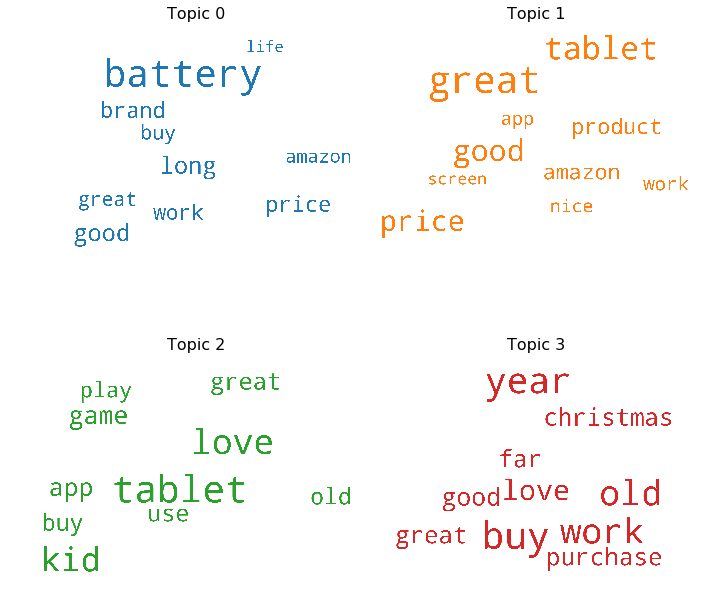

In [54]:
#Wordcloud
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

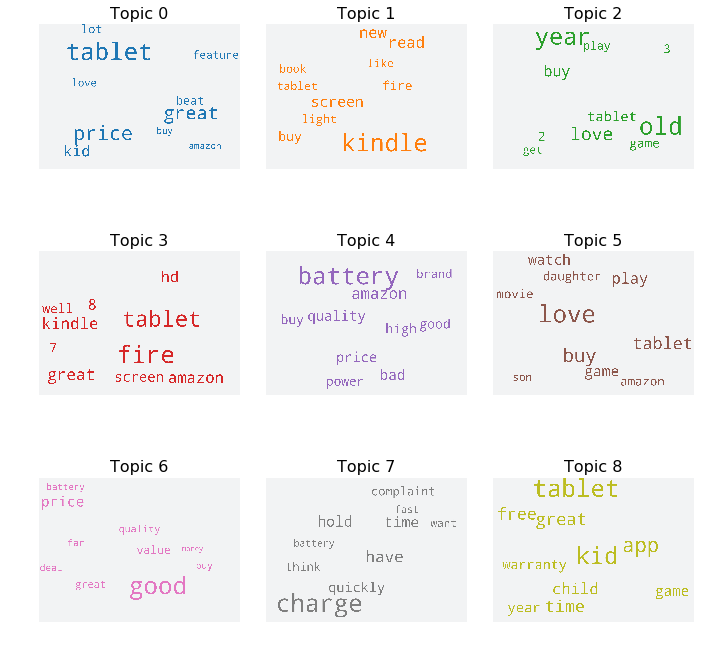

In [67]:
#Wordcloud
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='#F2F3F4',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda20.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling